# Gradient Descent
gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.$$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

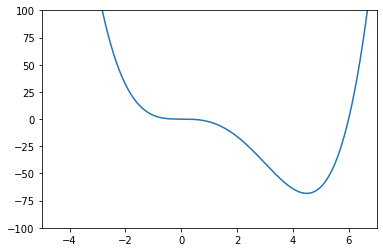

In [2]:
A = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(A,f(A))

In [3]:
def fp(x):
    return 2*x**3-9*x**2

(4.5, [<matplotlib.lines.Line2D at 0x1f1c87545b0>])

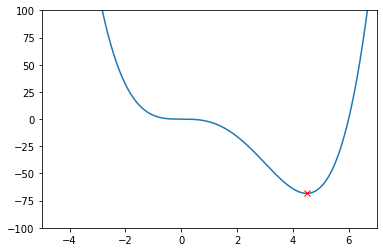

In [4]:
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(A,f(A))

x = -5
x_s = 2
delta = 0.02
precision = 0.00001
while (abs(x-x_s)>precision):
    x_s = x
    x = x_s - delta*fp(x_s)
x, plt.plot(x,f(x),'xr')

# Diabetes (regression)
다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.

1. sklearn을 이용하지 않고 (자신의 코드로)<br>
2. sklearn을 이용해서

In [5]:
from sklearn import datasets

In [6]:
diabetes= datasets.load_diabetes()

In [7]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [8]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

In [9]:
age = diabetes.data[:,0] # 나이
bmi = diabetes.data[:,2] # BMI
p = diabetes.data[:,3] # 혈압
y = diabetes.target

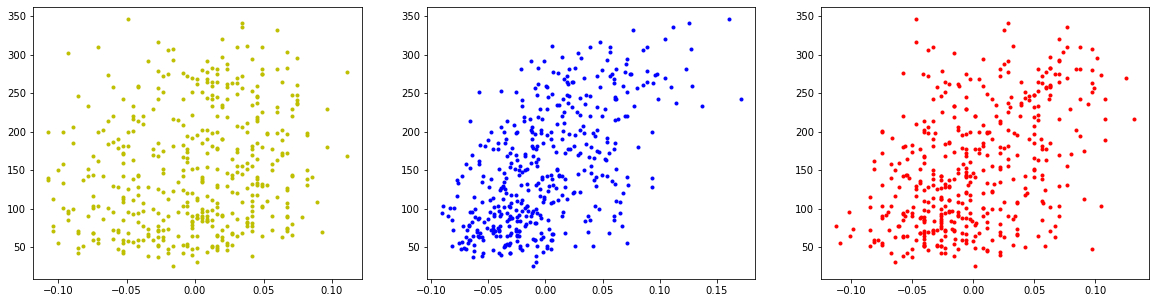

In [10]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(age,y,'y.')

plt.subplot(132)
plt.plot(bmi,y,'b.')

plt.subplot(133)
plt.plot(p,y,'r.')


# Gradient Descent

In [11]:
def lin(a,b,x):
    return a*x+b
def mse(a,b,x,y):
    y_h = a*x+b
    return np.mean((y_h-y)**2)

In [12]:
a,b,c,d,e,f=1,1,1,1,1,1
mse(a,b,age,y), mse(c,d,bmi,y), mse(e,f,p,y)

(28769.840800567745, 28766.92110741908, 28767.9830694855)

In [13]:
eps=10
n=0
while (n<10000):
    if(mse(a+eps,b,age,y)>mse(a-eps,b,age,y)):
        a=a-eps
    else:
        a=a+eps
    
    if(mse(a,b+eps,age,y)>mse(a,b-eps,age,y)):
        b = b-eps
    else:
        b = b+eps
        
        
    if(mse(c+eps,d,bmi,y)>mse(c-eps,d,bmi,y)):
        c=c-eps
    else:
        c=c+eps
    
    if(mse(c,d+eps,bmi,y)>mse(c,d-eps,bmi,y)):
        d = d-eps
    else:
        d = d+eps
        
        
    if(mse(e+eps,f,p,y)>mse(e-eps,f,p,y)):
        e=e-eps
    else:
        e=e+eps
    
    if(mse(e,f+eps,p,y)>mse(e,f-eps,p,y)):
        f = f-eps
    else:
        f = f+eps        
    n = n+1

In [14]:
a,b,c,d,e,f

(301, 161, 941, 161, 721, 161)

(5799.1850432895, 3969.232669586498, 4852.806673706807)

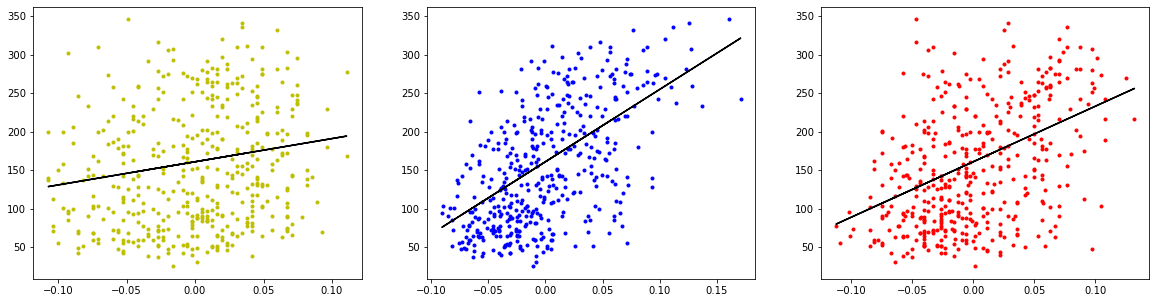

In [15]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(age,y,'y.')
plt.plot(age,lin(a,b,age),'k')

plt.subplot(132)
plt.plot(bmi,y,'b.')
plt.plot(bmi,lin(c,d,bmi),'k')

plt.subplot(133)
plt.plot(p,y,'r.')
plt.plot(p,lin(e,f,p),'k')

mse(a,b,age,y), mse(c,d,bmi,y), mse(e,f,p,y)

# Scikit-learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
AGE = [[i] for i in age]
BMI = [[i] for i in bmi]
P = [[i] for i in p]
Y = [[i] for i in y]
reg=LinearRegression()

In [18]:
reg.fit(AGE,Y)
Ac = reg.coef_
Ai = reg.intercept_
reg.fit(BMI,Y)
Bc = reg.coef_
Bi = reg.intercept_
reg.fit(P,Y)
Pc = reg.coef_
Pi = reg.intercept_

Ac,Ai,Bc,Bi,Pc,Pi

(array([[304.18307453]]),
 array([152.13348416]),
 array([[949.43526038]]),
 array([152.13348416]),
 array([[714.7416437]]),
 array([152.13348416]))

In [19]:
AGEY = reg.predict(AGE)
BMIY = reg.predict(BMI)
PY = reg.predict(P)

([5799.1850432895, 3969.232669586498],
 [4852.806673706807, 5720.5470172056475],
 [3890.4565854612724, 4774.1029574417935])

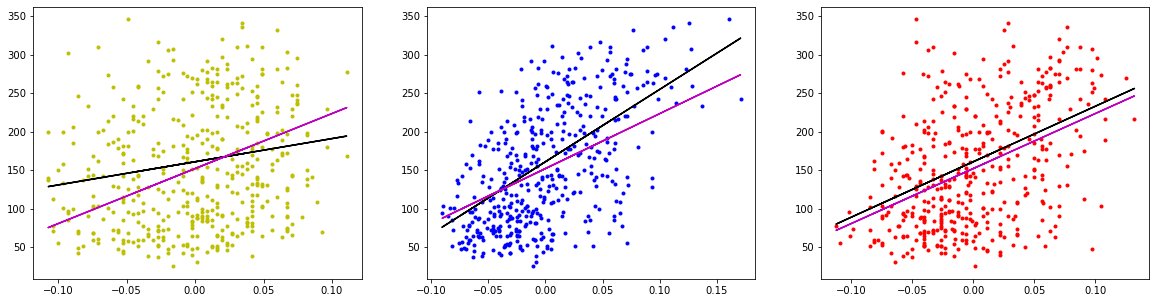

In [20]:
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(AGE,Y,'y.')
plt.plot(age,lin(a,b,age),'k')
plt.plot(AGE,AGEY,'m')

plt.subplot(132)
plt.plot(BMI,Y,'b.')
plt.plot(bmi,lin(c,d,bmi),'k')
plt.plot(BMI,BMIY,'m')

plt.subplot(133)
plt.plot(P,Y,'r.')
plt.plot(p,lin(e,f,p),'k')
plt.plot(P,PY,'m')

# 검은선 : 경사하강법 fit
# 자홍색 : scikit-learn fit

[mse(a,b,age,y), mse(c,d,bmi,y)], [mse(e,f,p,y), mse(Ac,Ai,age,y)], [mse(Bc,Bi,bmi,y), mse(Pc,Pi,p,y)]

### 나이의 경우 scikit-learn 의 fitting graph 가 Gradient Descent으로 구한 그래프보다 좋은 결과를 얻었지만, <br><br>BMI와 혈압의 경우는 오히려 Gradient Descent으로 구한 결과가 scikit-learn 보다 좋은 결과를 주었다.